In [2]:
# importing all the necessary  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# reading dataset from drive
data= pd.read_csv('/content/drive/MyDrive/train_loan.csv')

In [4]:
# returns the first 5 rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# checking the datatypes
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [33]:
# checking if missing values is present
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [9]:
# to check whethere any duplicated values are present in dataFrame
data.duplicated().sum() # no duplicates found

0

# 1. Findng missing values in dataset

In [10]:
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [11]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [12]:
# to fill missing values in categorical columns (object column), we can use mode
# for numerical values we can use mean/median
# 4 categorical columns- Gender, Married, Dependents, Self_Employed
# 3 numberical columns- LoanAmount, Laon_Amount_Term, Credit_History

In [34]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
data['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [5]:
# repeated value is Male, so fill the missing values with this value
data['Gender']=data['Gender'].fillna('Male')

In [84]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [85]:
data['Married'].value_counts()

,count
Married,
Yes,398
No,213


In [6]:
data['Married']=data['Married'].fillna('Yes')

In [22]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [23]:
data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [7]:
data['Dependents']=data['Dependents'].fillna('0')

In [39]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
data['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [8]:
data['Self_Employed']=data['Self_Employed'].fillna('No')

In [13]:
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [42]:
# to fill missing values in numerical columns, we can use median
# to check distribution of data, we can use histogram
# fill the numerical missing values, by checking data distribution

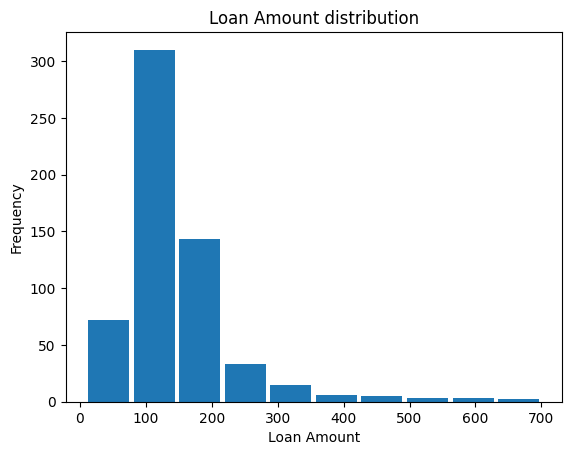

In [43]:
plt.hist(data['LoanAmount'],rwidth=0.9)
plt.title('Loan Amount distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [44]:
# the data is not normally distributed- go for median

data['LoanAmount'].median()

128.0

In [9]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())

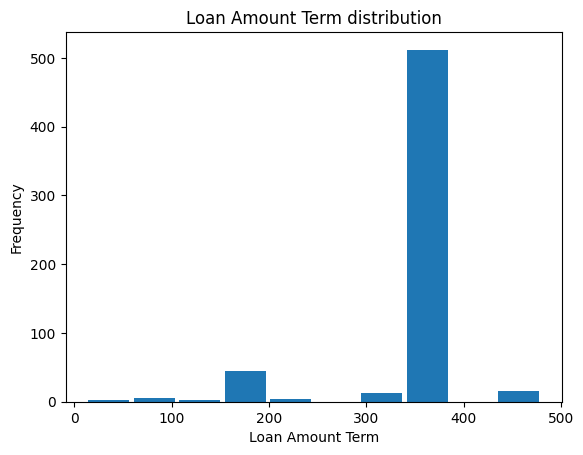

In [46]:
plt.hist(data['Loan_Amount_Term'],rwidth=0.9)
plt.title('Loan Amount Term distribution')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.show()

In [10]:
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

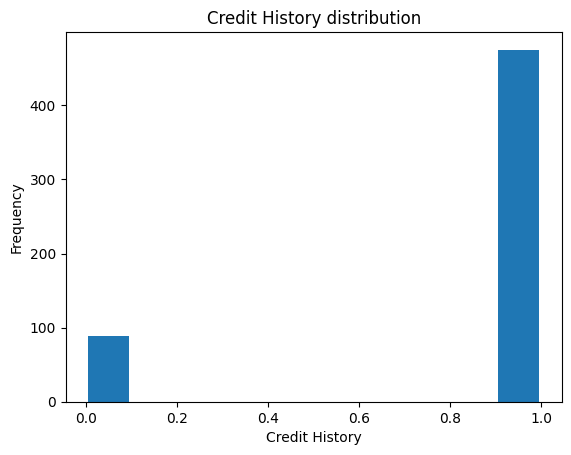

In [48]:
plt.hist(data['Credit_History'],rwidth=0.9)
plt.title('Credit History distribution')
plt.xlabel('Credit History')
plt.ylabel('Frequency')
plt.show()

In [11]:
data['Credit_History']= data['Credit_History'].fillna(data['Credit_History'].median())

In [93]:
data.isna().sum() # removed all missing values

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# 2. Outliers Detection

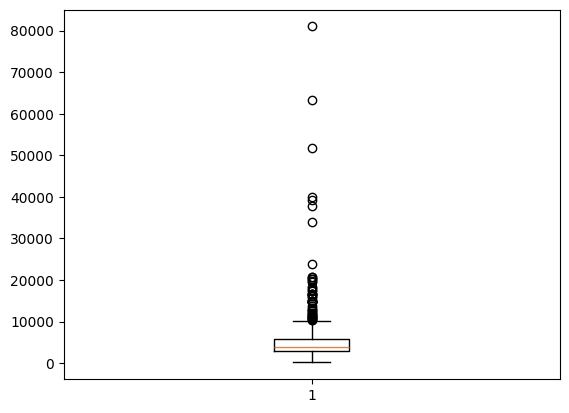

In [51]:
# we need to find outliers in numerical columns.

plt.boxplot(data['ApplicantIncome'])
plt.show()

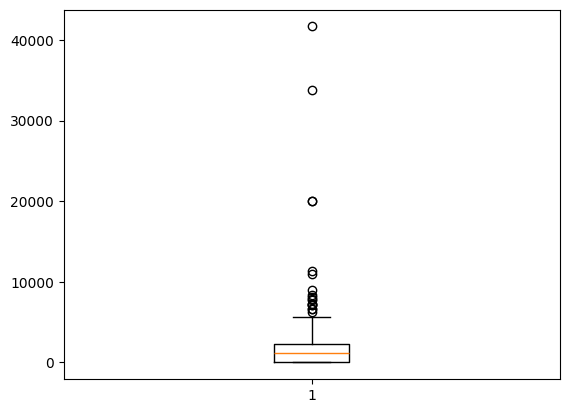

In [52]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

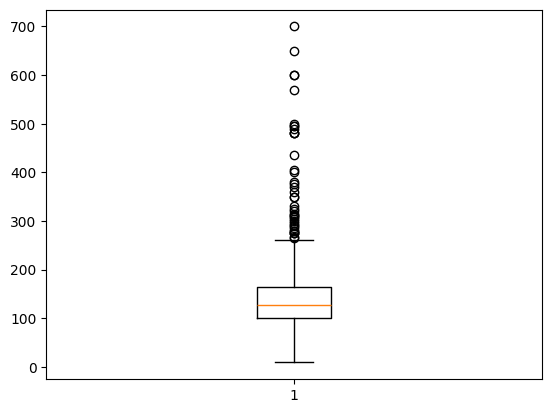

In [53]:
plt.boxplot(data['LoanAmount'])
plt.show()

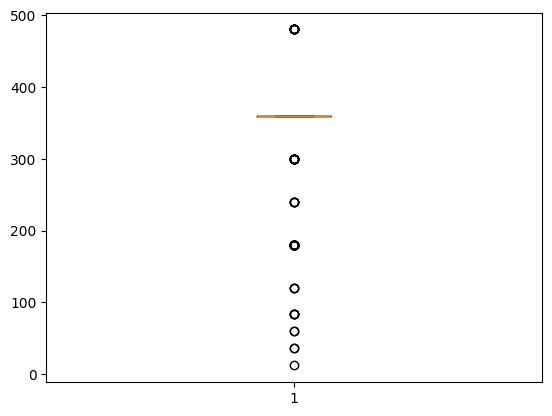

In [54]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

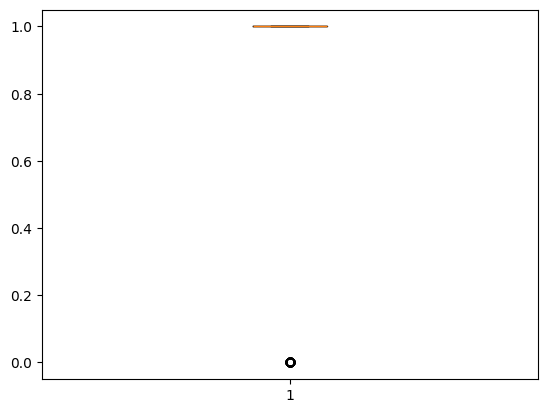

In [55]:
plt.boxplot(data['Credit_History'])
plt.show()

In [56]:
# scatter plot for better detection of outliers

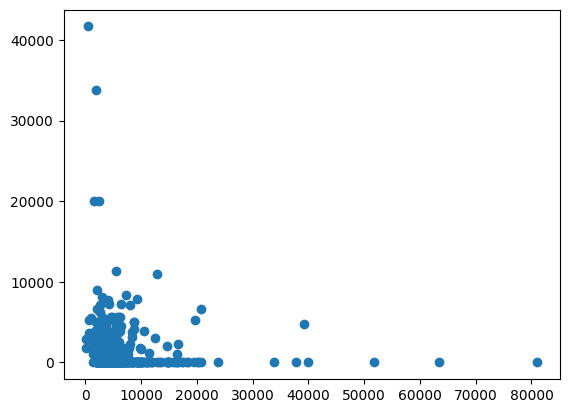

In [57]:
plt.scatter(data['ApplicantIncome'],data['CoapplicantIncome'])
plt.show()

In [59]:
data[data['ApplicantIncome']>80000].index

Index([409], dtype='int64')

In [60]:
data[data['CoapplicantIncome']>30000].index

Index([581, 600], dtype='int64')

In [61]:
data.drop(data[data['ApplicantIncome']>80000].index,inplace=True)
data.drop(data[data['CoapplicantIncome']>30000].index,inplace=True)

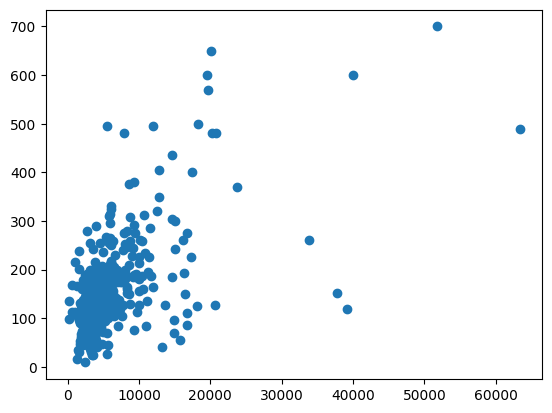

In [62]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])
plt.show()

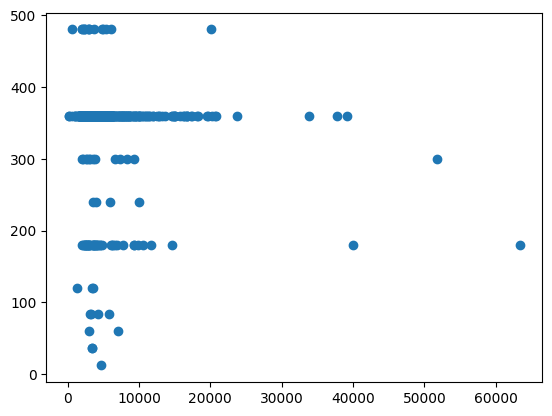

In [63]:
plt.scatter(data['ApplicantIncome'],data['Loan_Amount_Term'])
plt.show()

In [64]:
# not removing all outliers, since it is relevant to the dataset.

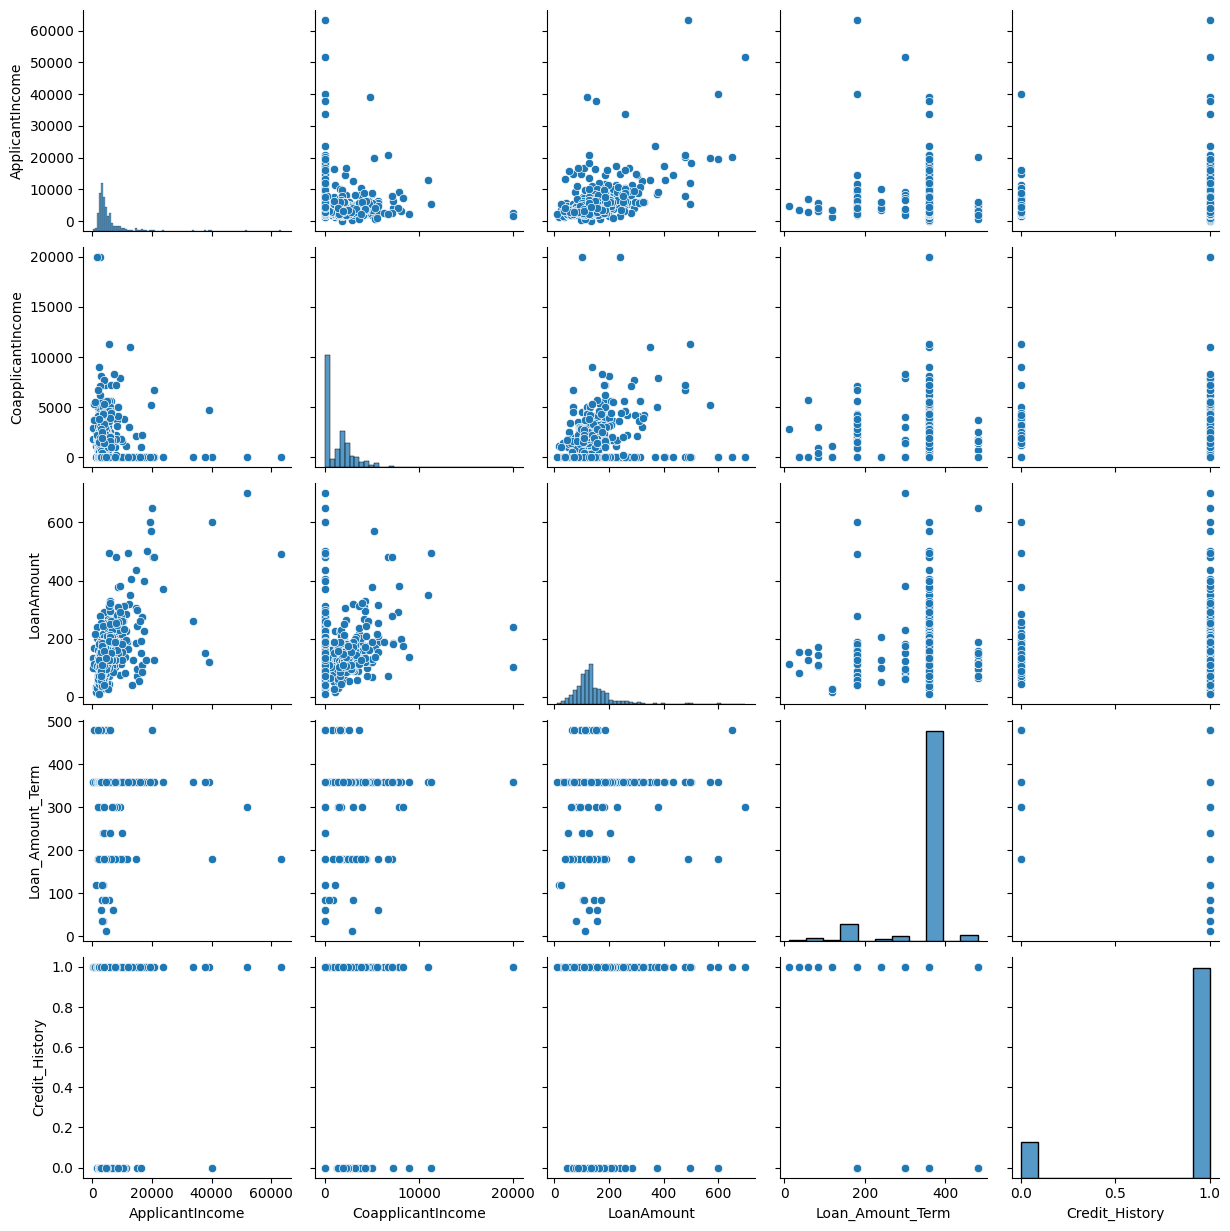

In [65]:
# just plotting pairplot for visualisation of outliers

sns.pairplot(data)
plt.show()

# 3. Encoding

In [66]:
# one hot encoding- not looking into order prefernce
# label encoding- data converted to ascending order, so lowest value will take 0 and so on, if data set is large, label encoding is not used.
# encoding done in object columns only- Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
# except Property_Area, we can use label encoding for all other fields
# one hot encoding for Propert_Area field
# no need to perform encoding in Loan_ID, since it is an unique identifier for the dataset

In [67]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
data['Gender']=le.fit_transform(data['Gender'])

In [14]:
data['Married']=le.fit_transform(data['Married'])

In [15]:
data['Dependents']=le.fit_transform(data['Dependents'])

In [16]:
data['Self_Employed']=le.fit_transform(data['Self_Employed'])

In [17]:
data['Education']=le.fit_transform(data['Education'])

In [23]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [18]:
# one hot encoding
data=pd.get_dummies(data,columns=['Property_Area'],dtype=int)

In [25]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Y,0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,N,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Y,0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Y,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Y,0,0,1


In [ ]:
# no need of scaling for the above dataset, income should not be scaled.

###Feature Target Splitting

In [19]:
# Here loan status is the target column.
x= data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y= data['Loan_Status']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

In [106]:
y_pred_dt

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score,recall_score

In [108]:
accuracy_score(y_test,y_pred_dt)

0.7317073170731707

In [109]:
confusion_matrix(y_test,y_pred_dt)

array([[23, 20],
       [13, 67]])

In [110]:
f1_score(y_test,y_pred_dt)

0.8023952095808383

In [111]:
precision_score(y_test,y_pred_dt)

0.7701149425287356

In [112]:
recall_score(y_test,y_pred_dt)

0.8375

#  Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.7642276422764228

In [114]:
confusion_matrix(y_test,y_pred_rf)

array([[18, 25],
       [ 5, 75]])

In [115]:
f1_score(y_test,y_pred_rf)

0.8333333333333334

In [116]:
precision_score(y_test,y_pred_rf)

0.75

In [117]:
recall_score(y_test,y_pred_rf)

0.9375

#  Bagging Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
y_pred_bc= bc.predict(x_test)
accuracy_score(y_test,y_pred_bc)

0.7317073170731707

In [33]:
from sklearn.svm import SVC
svc= SVC()

In [34]:
bagg_clf= BaggingClassifier(estimator=svc,n_estimators=100,random_state=42)
bagg_clf.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=42)

In [122]:
y_pred1= bagg_clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.6504065040650406

# Adaptive Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier
ab= AdaBoostClassifier(n_estimators=100)

In [39]:
ab.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [40]:
y_pred_ab= ab.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred_ab)

0.7479674796747967

# Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(n_estimators=100)

In [38]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [42]:
y_pred_gb= gb.predict(x_test)
accuracy_score(y_test,y_pred_gb)

0.7642276422764228

# XG Boosting

In [43]:
import xgboost as xgb

In [44]:
xgb_model= xgb.XGBClassifier()

In [45]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [46]:
y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

In [47]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
y_pred_xg= xgb_model.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred_xg)

0.7479674796747967

In [ ]:
# Random Forest and Gradient Boosting have better accuracy score than others

# Cross Validation

 K-Fold Cross-validation

In [24]:
# example for 10-fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold
model= LogisticRegression()
kf= KFold(n_splits=10)

In [26]:
cv_scores= cross_val_score(model,x,y,cv=kf)
cv_scores= np.round(cv_scores,4)
print("Cross Validation Scores are:")
for cv_score in cv_scores:
  print(cv_score)
print('Average Cross Validation Score is:',np.mean(cv_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores are:
0.7742
0.8387
0.7258
0.7581
0.7869
0.8033
0.8852
0.8361
0.7869
0.8361
Average Cross Validation Score is: 0.80313


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Leave One-Out Cross-Validation

Stratified Cross-Validation

In [27]:
from sklearn.model_selection import StratifiedKFold

In [28]:
skfold_validator= StratifiedKFold(n_splits=10)
skcv_results= cross_val_score(model,x,y,cv=skfold_validator)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [29]:
print("Stratified-Cross Validation Scores are:")
for skcv_result in skcv_results:
  print(np.round(skcv_result,4))
print('Average Stratified-Cross Validation Score is:',np.mean(skcv_results))

Stratified-Cross Validation Scores are:
0.8065
0.8226
0.7419
0.7581
0.7869
0.7869
0.8852
0.8361
0.7705
0.8361
Average Stratified-Cross Validation Score is: 0.8030671602326811


# Hyperparameter Tuning techniques/Fine tuning

# Tuning

In [30]:
from sklearn import tree
max_depth= [1,2,3,4,5,6,7,8,9,10]
mean_scores=[]
for val in max_depth:
  score= cross_val_score(tree.DecisionTreeClassifier(max_depth=val),x,y,cv=kf,scoring="accuracy")
  mean_scores.append(np.mean(score))
  print(f'Average score({val}):{"{:.5f}".format(score.mean())}')

Average score(1):0.80960
Average score(2):0.80473
Average score(3):0.79828
Average score(4):0.79014
Average score(5):0.76904
Average score(6):0.77049
Average score(7):0.76732
Average score(8):0.75085
Average score(9):0.74759
Average score(10):0.73789


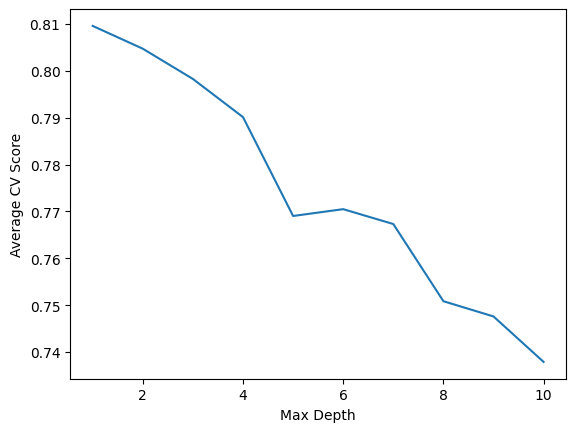

In [31]:
plt.plot(max_depth,mean_scores)
plt.xlabel('Max Depth')
plt.ylabel('Average CV Score')
plt.show()

# Grid Search

In [34]:
# Grid Search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
parameters={
    'max_depth':[10,50,60],
    'criterion':['gini','entropy'],
    'n_estimators':[100,200,300]
}

In [54]:
grid_search= GridSearchCV(
    RandomForestClassifier(),
    parameters,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
# n_jobs=-1 to speed up the grid search process.

In [55]:
grid_result= grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [56]:
print('Best Params: ',grid_result.best_params_)
print('Best Score: ',grid_result.best_score_)

Best Params:  {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}
Best Score:  0.8064110492681922


# Random Search

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
random_search= RandomizedSearchCV(
    estimator= RandomForestClassifier(),
    param_distributions=parameters,
    verbose=1,
    n_jobs=-1,
    n_iter=18
)

In [38]:
random_result= random_search.fit(x_train,y_train)
print('Best Params: ',random_result.best_params_)
print('Best Score: ',random_result.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Params:  {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}
Best Score:  0.8145537002679859


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [39]:
# Random Search CV is faster as compared to gridSearch CV